In [227]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [228]:
%matplotlib inline

In [229]:
data = pd.read_csv('oasis_longitudinal.csv')
data.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [230]:
data.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [231]:
data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [234]:
data.head(5)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [235]:
data['M/F'] = data['M/F'].replace(['F','M'], [0,1])
data['Group'] = data['Group'].replace(['Converted'], ['Demented'])
data['Group'] = data['Group'].replace(['Demented', 'Nondemented'], [1,0])
data = data.drop(['MRI ID', 'Visit', 'Hand'], axis=1)

In [236]:
data.head() 

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,0,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,1,0,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,1,560,1,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,1,1895,1,80,12,NaN,22.0,0.5,1698,0.701,1.034




1.   EDUC --> Años de educación
2.   SES  --> Estado socioeconomico
3.   MMSE --> Estado mental
4.   CDR  --> Rating clinico de demencia
5.   eTIV --> Volumen intracraneal estimado
6.   nWBV --> Volumen cerebral normalizado
7.   ASF  --> Factor de escala Atlas



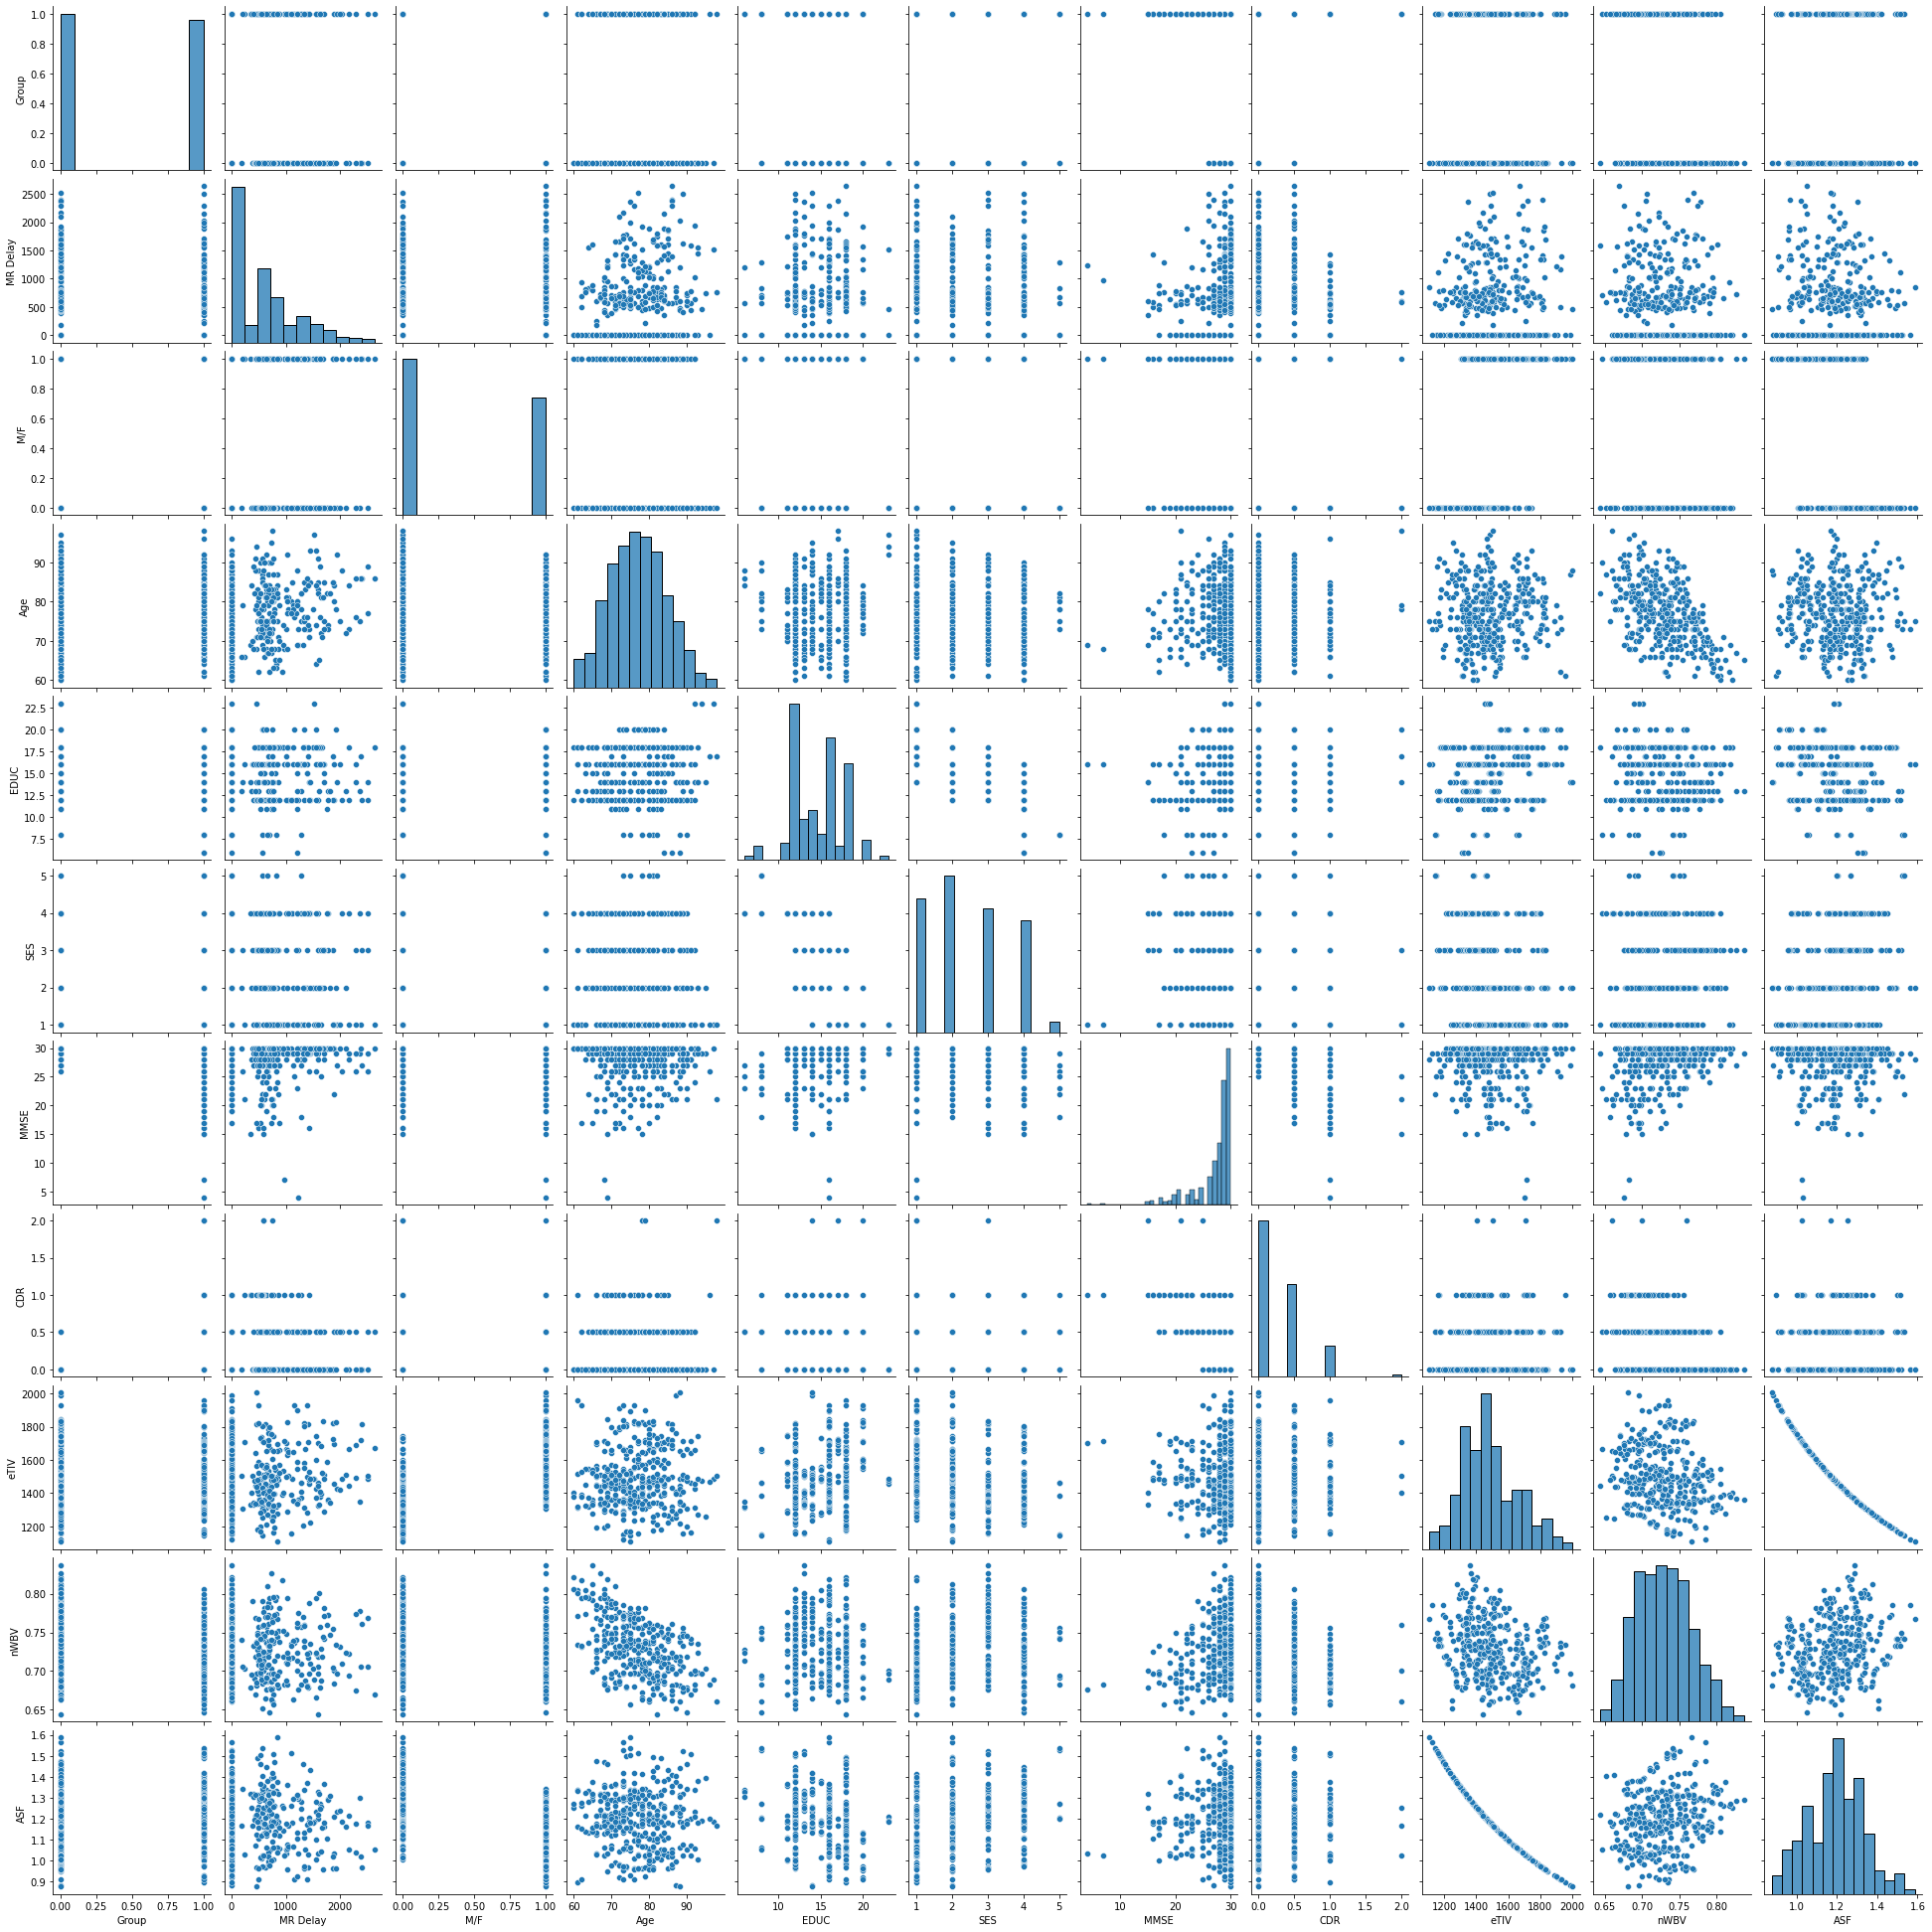

In [ ]:
sns.pairplot(data)

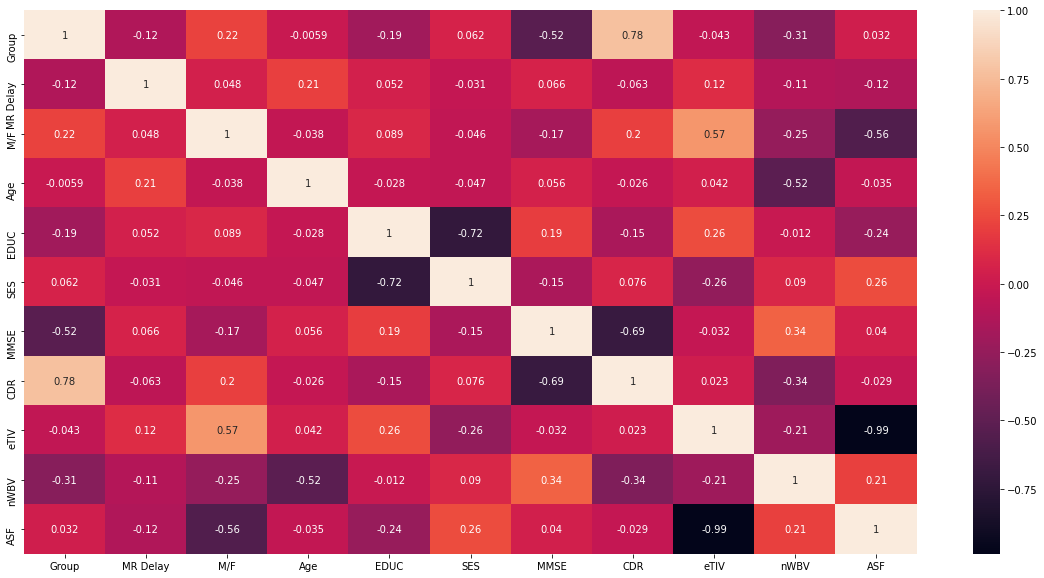

In [237]:
plt.figure(figsize=(20-0, 10.0))
sns.heatmap(data.corr(), annot=True)

In [238]:
pd.isnull(data).sum() 

Subject ID     0
Group          0
MR Delay       0
M/F            0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

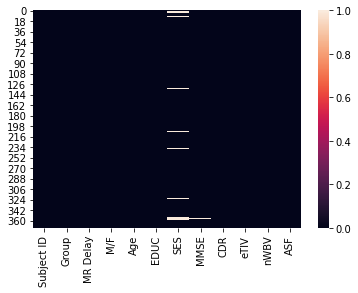

In [239]:
sns.heatmap(data.isnull())

In [240]:
data = data.dropna(axis=0, how='any')
pd.isnull(data).sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

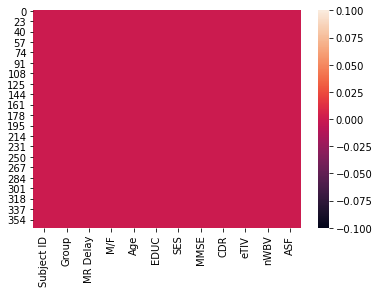

In [241]:
sns.heatmap(data.isnull())

In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import train_test_split

In [243]:
fullFeatures = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR','eTIV', 'nWBV', 'ASF']
positiveFeatures = ['M/F', 'SES', 'CDR']
target = ['Group']
tester = [[1, 70, 12, 2.0, 23,0.5 , 1738, 0.681, 1.046]]
testerPositve = [[1, 2.0, 0.5]]

In [244]:
X = data[fullFeatures]
y = data[target]

In [245]:
LogisticRegressionModel = LogisticRegression()
MLPClassifierModel  = MLPClassifier()
KNeighborsClassifierModel = KNeighborsClassifier()
SVCModel = SVC()
GaussianProcessClassifierModel  = GaussianProcessClassifier()
DecisionTreeClassifierModel = DecisionTreeClassifier()
RandomForestClassifierModel = RandomForestClassifier()
AdaBoostClassifierModel = AdaBoostClassifier()
GaussianNBModel = GaussianNB()
QuadraticDiscriminantAnalysisModel = QuadraticDiscriminantAnalysis()

In [246]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [247]:
LogisticRegressionModel.fit(x_train, y_train)
y_predict = LogisticRegressionModel.predict(tester)
LogisticRegressionModel.score(x_test, y_test)*100

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


92.95774647887323

In [248]:
y_predict

array([1])

In [249]:
MLPClassifierModel.fit(x_train, y_train)
y_predict = MLPClassifierModel.predict(tester)
MLPClassifierModel.score(x_test, y_test)*100

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


66.19718309859155

In [250]:
y_predict

array([1])

In [251]:
KNeighborsClassifierModel.fit(x_train, y_train)
y_predict = KNeighborsClassifierModel.predict(tester)
KNeighborsClassifierModel.score(x_test, y_test)*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


64.7887323943662

In [252]:
y_predict

array([1])

In [253]:
SVCModel.fit(x_train, y_train)
y_predict = SVCModel.predict(tester)
SVCModel.score(x_test, y_test)*100

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


52.112676056338024

In [254]:
y_predict

array([0])

In [255]:
GaussianProcessClassifierModel.fit(x_train, y_train)
y_predict = GaussianProcessClassifierModel.predict(tester)
SVCModel.score(x_test, y_test)*100

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


52.112676056338024

In [256]:
y_predict

array([1])

In [257]:
DecisionTreeClassifierModel.fit(x_train, y_train)
y_predict = DecisionTreeClassifierModel.predict(tester)
DecisionTreeClassifierModel.score(x_test, y_test)*100

92.95774647887323

In [258]:
y_predict

array([1])

In [259]:
RandomForestClassifierModel.fit(x_train, y_train)
y_predict = RandomForestClassifierModel.predict(tester)
RandomForestClassifierModel.score(x_test, y_test)*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


92.95774647887323

In [260]:
y_predict

array([1])

In [261]:
AdaBoostClassifierModel.fit(x_train, y_train)
y_predict = AdaBoostClassifierModel.predict(tester)
AdaBoostClassifierModel.score(x_test, y_test)*100

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


87.32394366197182

In [262]:
y_predict

array([1])

In [263]:
GaussianNBModel.fit(x_train, y_train)
y_predict = GaussianNBModel.predict(tester)
GaussianNBModel.score(x_test, y_test)*100

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


90.14084507042254

In [264]:
y_predict

array([1])

In [265]:
QuadraticDiscriminantAnalysisModel.fit(x_train, y_train)
y_predict = QuadraticDiscriminantAnalysisModel.predict(tester)
GaussianNBModel.score(x_test, y_test)*100

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


90.14084507042254

In [266]:
y_predict

array([1])

In [267]:
#POSITIVE FEATURES

In [268]:
X = data[positiveFeatures]
y = data[target]

In [269]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [270]:
LogisticRegressionModel.fit(x_train, y_train)
y_predict = LogisticRegressionModel.predict(testerPositve)
LogisticRegressionModel.score(x_test, y_test)*100

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


92.95774647887323

In [271]:
y_predict

array([1])

In [272]:
MLPClassifierModel.fit(x_train, y_train)
y_predict = MLPClassifierModel.predict(testerPositve)
MLPClassifierModel.score(x_test, y_test)*100

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


92.95774647887323

In [273]:
y_predict

array([1])

In [274]:
KNeighborsClassifierModel.fit(x_train, y_train)
y_predict = KNeighborsClassifierModel.predict(testerPositve)
KNeighborsClassifierModel.score(x_test, y_test)*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


91.54929577464789

In [275]:
y_predict

array([1])

In [276]:
SVCModel.fit(x_train, y_train)
y_predict = SVCModel.predict(testerPositve)
SVCModel.score(x_test, y_test)*100

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


92.95774647887323

In [277]:
y_predict

array([1])

In [278]:
GaussianProcessClassifierModel.fit(x_train, y_train)
y_predict = GaussianProcessClassifierModel.predict(testerPositve)
SVCModel.score(x_test, y_test)*100

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


92.95774647887323

In [279]:
y_predict

array([1])

In [280]:
DecisionTreeClassifierModel.fit(x_train, y_train)
y_predict = DecisionTreeClassifierModel.predict(testerPositve)
DecisionTreeClassifierModel.score(x_test, y_test)*100

92.95774647887323

In [281]:
y_predict

array([1])

In [282]:
RandomForestClassifierModel.fit(x_train, y_train)
y_predict = RandomForestClassifierModel.predict(testerPositve)
RandomForestClassifierModel.score(x_test, y_test)*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


92.95774647887323

In [283]:
y_predict

array([1])

In [284]:
AdaBoostClassifierModel.fit(x_train, y_train)
y_predict = AdaBoostClassifierModel.predict(testerPositve)
AdaBoostClassifierModel.score(x_test, y_test)*100

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


92.95774647887323

In [285]:
y_predict

array([1])

In [286]:
GaussianNBModel.fit(x_train, y_train)
y_predict = GaussianNBModel.predict(testerPositve)
GaussianNBModel.score(x_test, y_test)*100

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


92.95774647887323

In [287]:
y_predict

array([1])

In [288]:
QuadraticDiscriminantAnalysisModel.fit(x_train, y_train)
y_predict = QuadraticDiscriminantAnalysisModel.predict(testerPositve)
GaussianNBModel.score(x_test, y_test)*100

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


92.95774647887323

In [289]:
y_predict

array([1])

In [290]:
notDementedTest = [[1, 2.0, 0.0]]
dementedTest = [[0, 3.0, 1447]]

In [291]:
RandomForestClassifierModel.predict(notDementedTest)

array([0])

In [292]:
DecisionTreeClassifierModel.predict(notDementedTest)

array([0])

In [293]:
RandomForestClassifierModel.predict(dementedTest)

array([1])

In [294]:
DecisionTreeClassifierModel.predict(dementedTest)

array([1])